In [2]:
from matplotlib import pyplot as plt
import pandas 
import numpy as np
import json
import math
import WorkFlow
import utils

## 读取GT

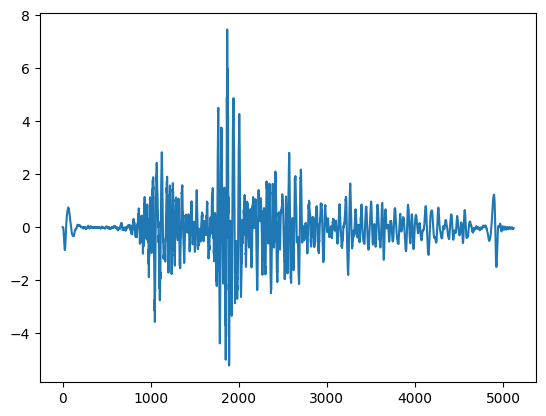

In [3]:
GT = pandas.read_excel("./Ground_Truth.xlsx")
GT = GT.to_numpy()
## 重采样和视频频率对齐
###  127 / 25 = 5 ....2
### 共采样 25次 采样步长： 5 在step 8 和setp 16 使用步长6  
resample = []
i = 0
intercalary = False
while i < len(GT):
    resample.append(float(GT[i][0]))
    i += 5
    if i == 40 or i == 81:
        i += 1
resample = np.array(resample)

GT = resample

fig1, ax = plt.subplots()
ax.plot(list(range(len(GT))), GT, label='0.json')

In [4]:
Video = WorkFlow.WorkFlow(video_path="./data_vision.MTS")

# 计算比例因子并验证

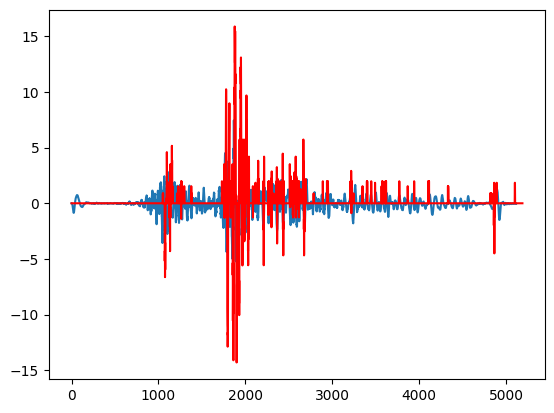

In [18]:
# length_ratio.py 的输出结果
length_ratio1 = 8.88888888888889
length_ratio2 = 7.496340570653091
length_ratio3 = 6.65640235470275
length_ratio4 = 5.5813953488372094

f1_result = np.load("./numpy_rawdata/f1.npy")[310:5500]
f1_result = f1_result * length_ratio1

fig3, ax3 = plt.subplots()
ax3.plot(list(range(len(GT))), GT, label='0.json')
ax3.plot(list(range(len(f1_result))), f1_result, color='r', label='f4')


## 输出最后结果

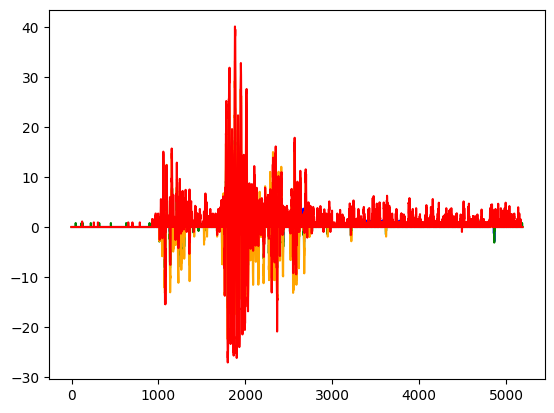

In [16]:
f1_result = np.load("./numpy_rawdata/f1.npy")[310:5500]
f4_result = np.load("./numpy_rawdata/f4.npy")[310:5500]
f3_result = np.load("./numpy_rawdata/f3.npy")[310:5500]
f2_result = np.load("./numpy_rawdata/f2.npy")[310:5500]

f1_result = f1_result * length_ratio1
f2_result = f2_result * length_ratio2
f3_result = f3_result * length_ratio3
f4_result = f4_result * length_ratio4

fig2, ax = plt.subplots()
ax.plot(list(range(len(f1_result))), f1_result, label='f1', color='blue')
ax.plot(list(range(len(f2_result))), f2_result, label='f2', color='green')
ax.plot(list(range(len(f3_result))), f3_result, label='f3', color='orange')
ax.plot(list(range(len(f4_result))), f4_result, label='f4', color='red')

# import scipy
# result = np.stack((f1_result, f2_result, f3_result, f4_result), axis=1)
# result 
# print(np.shape(result))
# result = scipy.io.savemat("result.mat", {'result': result})